In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The dataset
Generating time series data (complex waveform).

In [5]:
X_train = np.arange(0,50,0.5)
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5)
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

In [6]:
import csv


# File path to save the CSV file
file_path = 'time_series_data.csv'

# Writing time series data to a CSV file using csv.writer
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(len(y_train)):
        writer.writerow([y_train[i]])

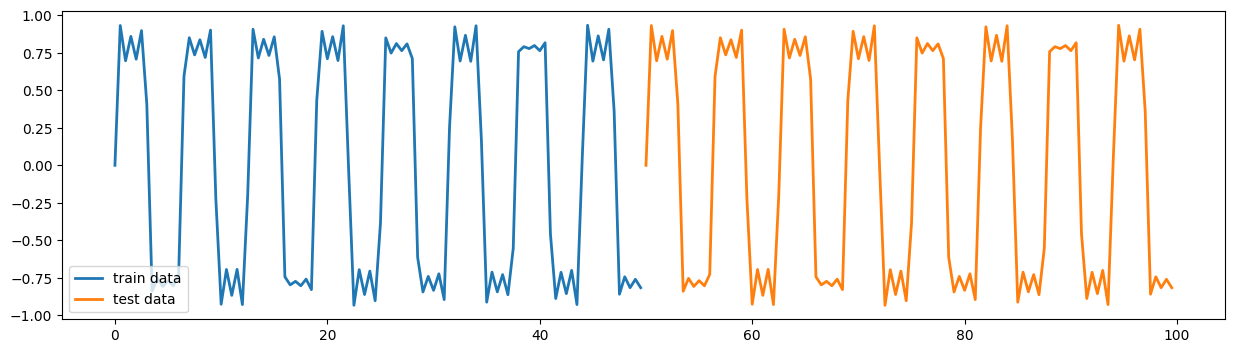

In [7]:
n_features = 1
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show();

## Generator for training and test data

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back  = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

## Create an LSTM model

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))


The optimizer used to update the model's internal parameters (weights and biases) during training is 'adam' which is popular choice due to its efficiency.
The loss function, which the model will try to minimize during training, is mse (mean squared error). This is a common loss function used for regression problems.

In [10]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(train_generator,epochs=300, verbose=1)

## Using the trained model

In [7]:
test_predictions  = model.predict(test_generator)

8/8 [==============================] - 1s 3ms/step


8/8 [==============================] - 0s 3ms/step


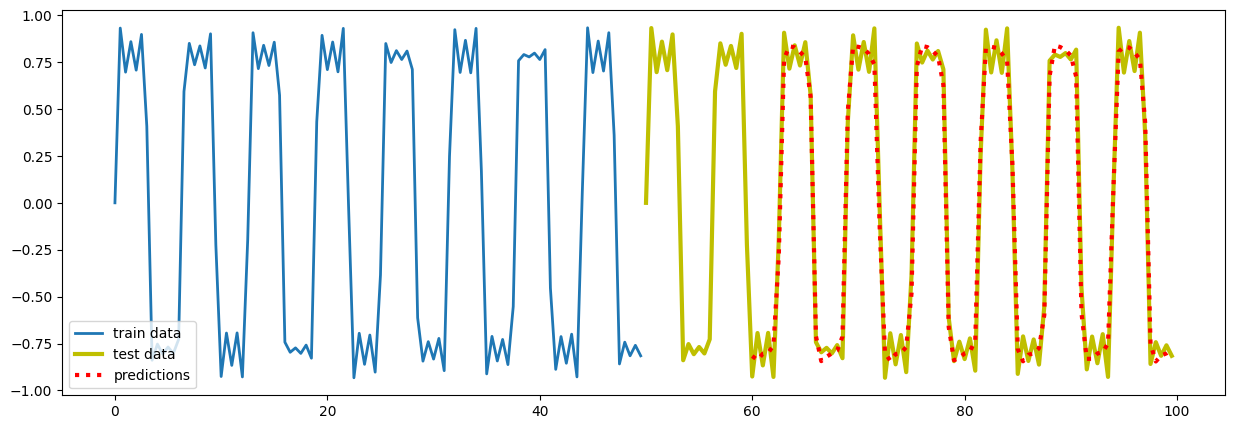

In [8]:
test_predictions  = model.predict(test_generator)
x = np.arange(60,100,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()

## Save the trained model

In [9]:
model.save("time_series.keras")

Resources:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/